# Part A:
Using raw pixel values as the inputs.

## KNN:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 3072)
(50000, 1)
(10000, 3072)
(10000, 1)


In [6]:
k = 6
#Train Model and Predict  
clf=KNeighborsClassifier(n_neighbors=k)
neigh = clf.fit(x_train,y_train)
neigh

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [7]:
y_hat = neigh.predict(x_test)

In [8]:
print(y_test[0:5])
print(y_hat[0:5])

[[3]
 [8]
 [8]
 [0]
 [6]]
[2 8 8 0 4]


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.40      0.54      0.46      1000
           1       0.67      0.19      0.30      1000
           2       0.23      0.46      0.30      1000
           3       0.28      0.21      0.24      1000
           4       0.24      0.51      0.33      1000
           5       0.43      0.22      0.29      1000
           6       0.34      0.25      0.29      1000
           7       0.70      0.20      0.31      1000
           8       0.40      0.67      0.50      1000
           9       0.72      0.14      0.24      1000

    accuracy                           0.34     10000
   macro avg       0.44      0.34      0.33     10000
weighted avg       0.44      0.34      0.33     10000



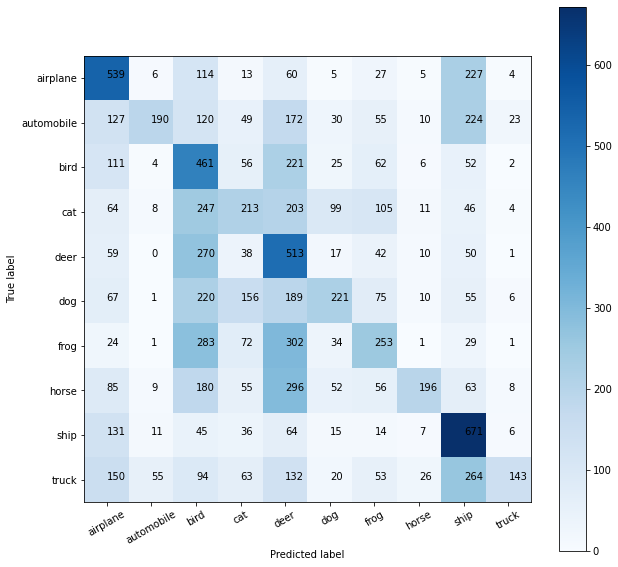

In [10]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,y_hat)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

## Decision Tree:

In [11]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [12]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
Tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
predTree = Tree.predict(x_test)

In [15]:
print (predTree [0:5])
print (y_test [0:5])

[6 8 8 8 6]
[[3]
 [8]
 [8]
 [0]
 [6]]


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.44      0.28      0.35      1000
           1       0.29      0.23      0.25      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.18      0.19      0.18      1000
           5       0.25      0.20      0.23      1000
           6       0.21      0.61      0.32      1000
           7       0.22      0.21      0.21      1000
           8       0.32      0.49      0.39      1000
           9       0.20      0.28      0.24      1000

    accuracy                           0.25     10000
   macro avg       0.21      0.25      0.22     10000
weighted avg       0.21      0.25      0.22     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


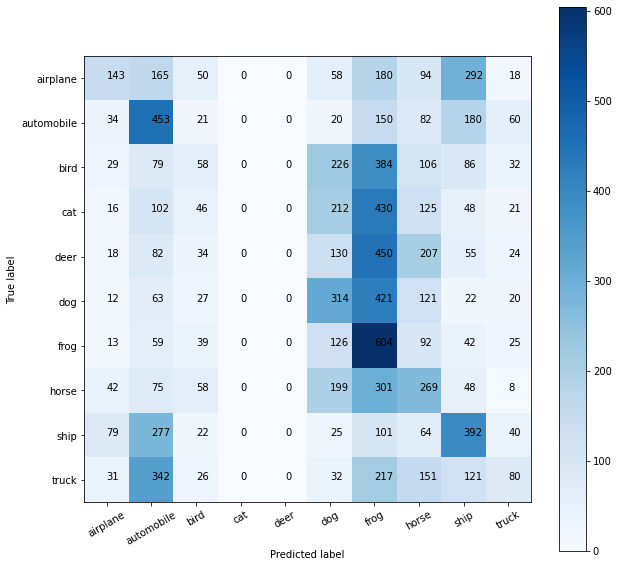

In [49]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,predTree)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

## Linear Classifier:

In [18]:
from sklearn.linear_model import RidgeClassifier

lin = RidgeClassifier().fit(x_train, y_train)

linpred = lin.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, linpred))

              precision    recall  f1-score   support

           0       0.41      0.47      0.44      1000
           1       0.38      0.45      0.41      1000
           2       0.29      0.21      0.24      1000
           3       0.26      0.18      0.21      1000
           4       0.33      0.24      0.28      1000
           5       0.31      0.28      0.30      1000
           6       0.36      0.45      0.40      1000
           7       0.41      0.43      0.42      1000
           8       0.43      0.51      0.47      1000
           9       0.37      0.43      0.40      1000

    accuracy                           0.36     10000
   macro avg       0.35      0.36      0.36     10000
weighted avg       0.35      0.36      0.36     10000



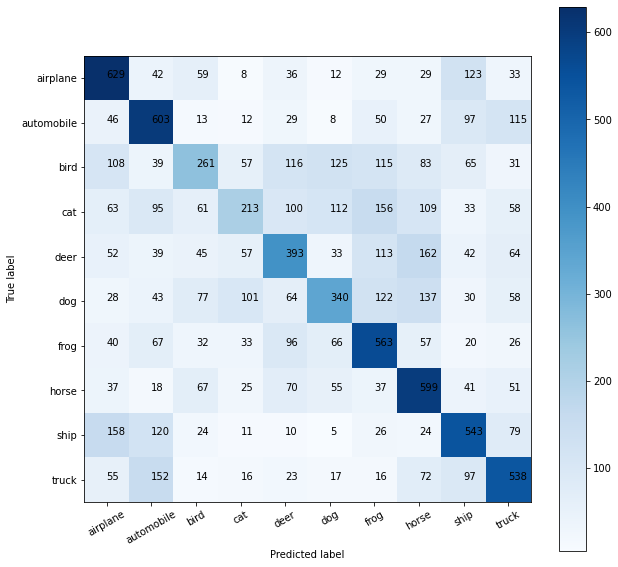

In [48]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,linpred)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

## Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(solver='liblinear')
LR=clf.fit(x_train,y_train)

In [ ]:
y_hat = LR.predict(x_test)
print(y_hat[0:5])
print(y_test[0:5])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

In [ ]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,y_hat)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

## Ada-boost:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_train, y_train)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean()

In [ ]:
y_hat = clf.predict(x_test)
print(y_hat[0:5])
print(y_test[0:5])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

In [ ]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,y_hat)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

## SVM:

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(x_train, y_train) 

In [ ]:
y_hat = clf.predict(x_test)
print(y_hat[0:5])
print(y_test[0:5])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

In [ ]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,y_hat)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

# **Part B:**
Using HOG features as the inputs.

## Extracting HOG features:

In [21]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
import cv2
import numpy as np

winSize     = (32,32)
blockSize   = (16,16)
blockStride = (16,16)
cellSize    = (8,8)
nbins       = 9
hog         = cv2.HOGDescriptor(winSize,
                                blockSize,
                                blockStride,
                                cellSize,
                                nbins)
winStride  = (32,32)
X_TRAIN = []
X_TEST = []

for i in range(len(x_train)):
  X_TRAIN.append(cv2.cvtColor(x_train[i],cv2.cv2.COLOR_BGR2GRAY))
  X_TRAIN[i]=hog.compute(X_TRAIN[i],winStride)
  
for j in range(len(x_test)):
  X_TEST.append(cv2.cvtColor(x_test[j],cv2.cv2.COLOR_BGR2GRAY))
  X_TEST[j] = hog.compute(X_TEST[j],winStride)

X_TRAIN = np.array(X_TRAIN)
X_TEST = np.array(X_TEST)

print('x train shape:',X_TRAIN.shape)

x train shape: (50000, 144, 1)


In [ ]:
plt.imshow(X_TRAIN[0])

In [23]:
X_TRAIN = X_TRAIN.reshape(50000,144)
X_TEST = X_TEST.reshape(10000,144)

## KNN:

In [24]:
print(X_TRAIN.shape)
print(X_TEST.shape)

(50000, 144)
(10000, 144)


In [25]:
k = 6
#Train Model and Predict  
clf=KNeighborsClassifier(n_neighbors=k)
neigh = clf.fit(X_TRAIN,y_train)
neigh

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [26]:
y_hat = neigh.predict(X_TEST)

In [ ]:
print(y_test[0:5])
print(y_hat[0:5])

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.63      0.49      0.55      1000
           1       0.60      0.68      0.64      1000
           2       0.39      0.34      0.36      1000
           3       0.41      0.18      0.25      1000
           4       0.28      0.59      0.38      1000
           5       0.46      0.28      0.35      1000
           6       0.38      0.71      0.50      1000
           7       0.68      0.45      0.54      1000
           8       0.61      0.45      0.52      1000
           9       0.64      0.51      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



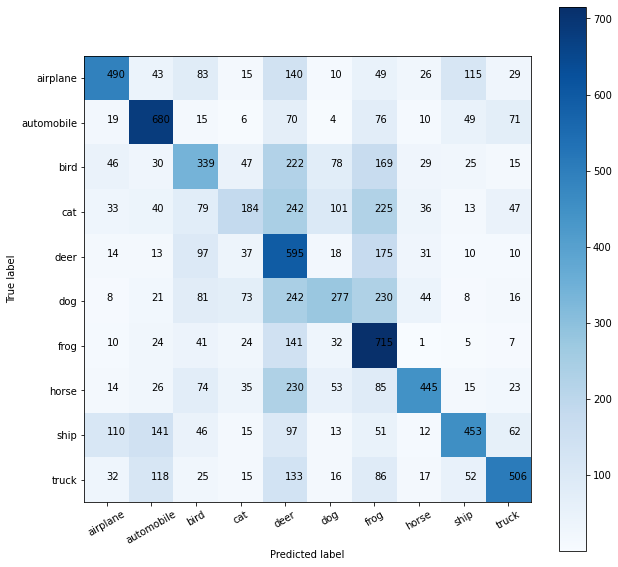

In [28]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,y_hat)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

## Decision Tree:

In [29]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [30]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [31]:
Tree.fit(X_TRAIN, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
predTree = Tree.predict(X_TEST)

In [ ]:
print (predTree [0:5])
print (y_test [0:5])

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(Tree)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.34      0.14      0.20      1000
           1       0.27      0.45      0.34      1000
           2       0.15      0.06      0.08      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.23      0.31      0.27      1000
           6       0.19      0.60      0.29      1000
           7       0.21      0.27      0.23      1000
           8       0.30      0.39      0.34      1000
           9       0.24      0.08      0.12      1000

    accuracy                           0.23     10000
   macro avg       0.19      0.23      0.19     10000
weighted avg       0.19      0.23      0.19     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


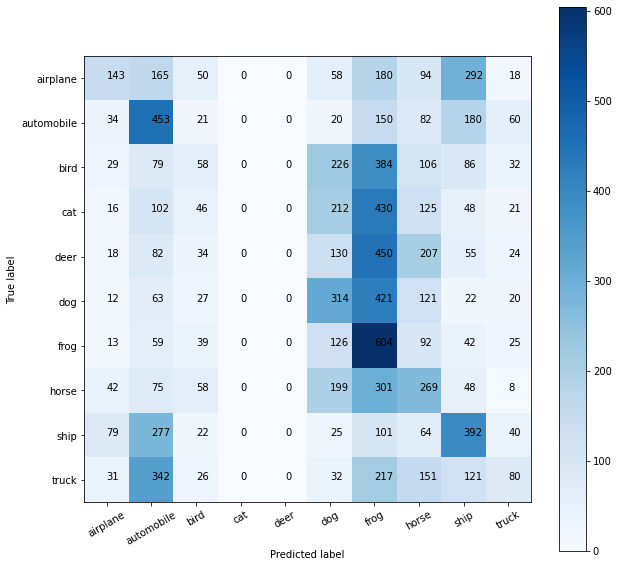

In [50]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,predTree)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

## Linear Classifier:

In [35]:
from sklearn.linear_model import RidgeClassifier

lin = RidgeClassifier().fit(X_TRAIN, y_train)

linpred = lin.predict(X_TEST)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, linpred))

              precision    recall  f1-score   support

           0       0.52      0.63      0.57      1000
           1       0.50      0.60      0.54      1000
           2       0.40      0.26      0.32      1000
           3       0.40      0.21      0.28      1000
           4       0.42      0.39      0.41      1000
           5       0.44      0.34      0.38      1000
           6       0.46      0.56      0.51      1000
           7       0.46      0.60      0.52      1000
           8       0.50      0.54      0.52      1000
           9       0.51      0.54      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



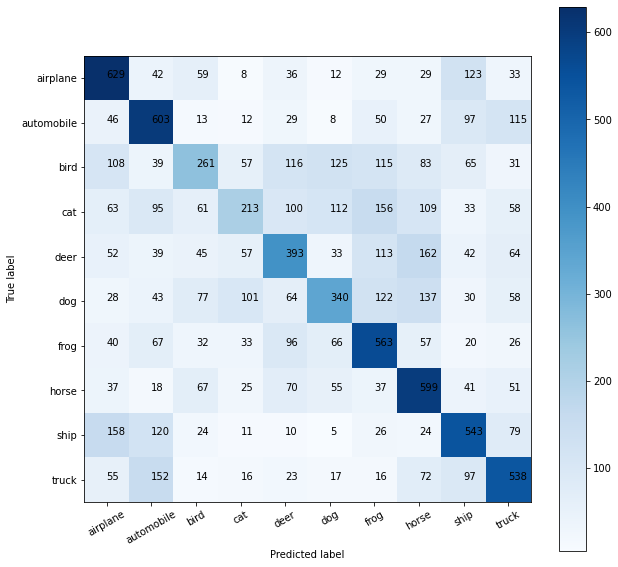

In [52]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,linpred)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

## Logistic Regression:

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(solver='liblinear')
LR=clf.fit(X_TRAIN,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
y_hat = LR.predict(X_TEST)
print(y_hat[0:5])
print(y_test[0:5])

[6 8 1 0 6]
[[3]
 [8]
 [8]
 [0]
 [6]]


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56      1000
           1       0.54      0.59      0.56      1000
           2       0.39      0.29      0.33      1000
           3       0.38      0.25      0.30      1000
           4       0.40      0.46      0.43      1000
           5       0.43      0.37      0.40      1000
           6       0.45      0.60      0.52      1000
           7       0.51      0.55      0.53      1000
           8       0.53      0.55      0.54      1000
           9       0.56      0.59      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



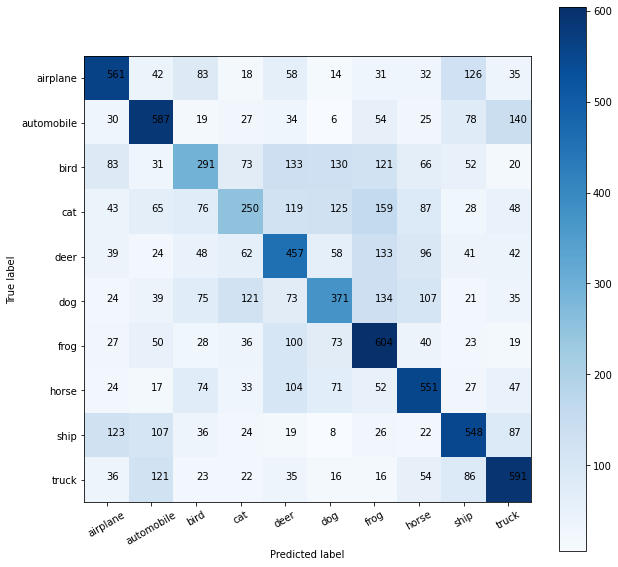

In [41]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,y_hat)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

## Ada-boost:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X_TRAIN, y_train, cv=5)
scores.mean()

In [ ]:
y_hat = clf.predict(X_TEST)
print(y_hat[0:5])
print(y_test[0:5])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

In [ ]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,y_hat)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  

## SVM:

In [44]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_TRAIN, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [45]:
y_hat = clf.predict(X_TEST)
print(y_hat[0:5])
print(y_test[0:5])

[6 8 1 0 6]
[[3]
 [8]
 [8]
 [0]
 [6]]


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1000
           1       0.57      0.61      0.59      1000
           2       0.38      0.32      0.35      1000
           3       0.36      0.26      0.30      1000
           4       0.39      0.47      0.43      1000
           5       0.44      0.39      0.41      1000
           6       0.47      0.58      0.52      1000
           7       0.54      0.53      0.53      1000
           8       0.55      0.57      0.56      1000
           9       0.60      0.58      0.59      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



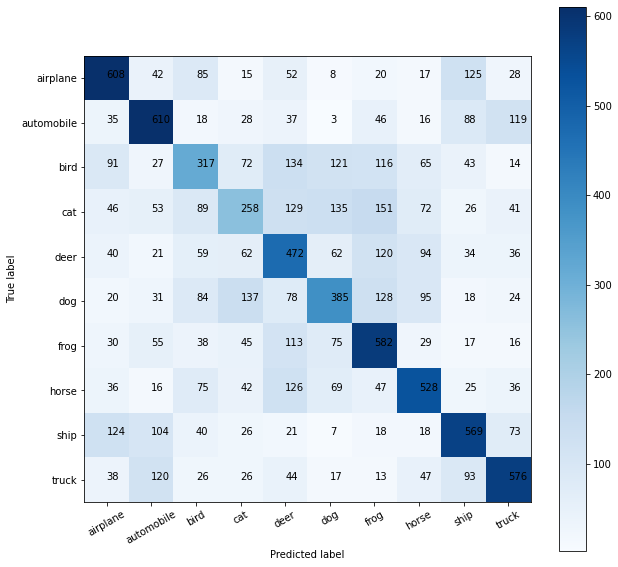

In [47]:
# Compute confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test,y_hat)
# print(cnf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix,plt.cm.Blues)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation=30)
plt.yticks(tick_marks, classes)
for i in range(10):
  for j in range(10):
    plt.text(j,i,cnf_matrix[i,j])
plt.show()  